In [1]:
import pandas as pd

In [2]:
# #wczytywanie danych
# file=pd.read_csv("single-cell-tracks_exp1-6_noErbB2.csv")
# metadata=pd.read_csv("01-readme-experiment-description_2022-04-05.csv")

In [3]:
# file.head()

In [4]:
# metadata.head()

In [5]:
# # łączenie danych z metadanymi
# merged_data = pd.merge(
#     file,
#     metadata,
#     left_on="Image_Metadata_Site",
#     right_on="Site",
#     how="left"
# )

In [6]:
# # zapisanie połączonych danych
# merged_data.to_csv("merged_cell_tracks_with_metadata.csv", index=False)

In [3]:
merged_data = pd.read_csv("merged_cell_tracks_with_metadata.csv")
merged_data.head()



,Exp_ID,Image_Metadata_Site,track_id,Image_Metadata_T,Nuclear_size,ERKKTR_ratio,FoxO3A_ratio,objNuclei_Location_Center_X,objNuclei_Location_Center_Y,Site,Cell_Line,Mutation,Biosensors,Conditions,Acquisition_frequency_min,Duration_h
0,1,1,1,0,303.000,0.704407,1.33383,932.211,875.248,1,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
1,1,1,1,1,333.000,0.848242,1.33791,932.150,874.174,1,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
2,1,1,1,2,314.000,1.059170,1.37627,932.376,873.787,1,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
3,1,1,1,3,322.000,1.188000,1.35754,932.168,873.453,1,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24
4,1,1,1,4,313.999,1.205540,1.36695,931.146,872.885,1,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24


In [4]:
# Grupowanie danych po mutacji i czasie
grouped = merged_data.groupby(['Mutation', 'Image_Metadata_T'])

# Obliczenie średnich i odchyleń standardowych
summary = grouped.agg({
    'ERKKTR_ratio': ['mean', 'std'],
    'FoxO3A_ratio': ['mean', 'std']
}).reset_index()

# Poprawienie nazw kolumn dla łatwiejszego dostępu
summary.columns = [
    'Mutation', 
    'Time', 
    'ERK_mean', 
    'ERK_std', 
    'AKT_mean', 
    'AKT_std'
]

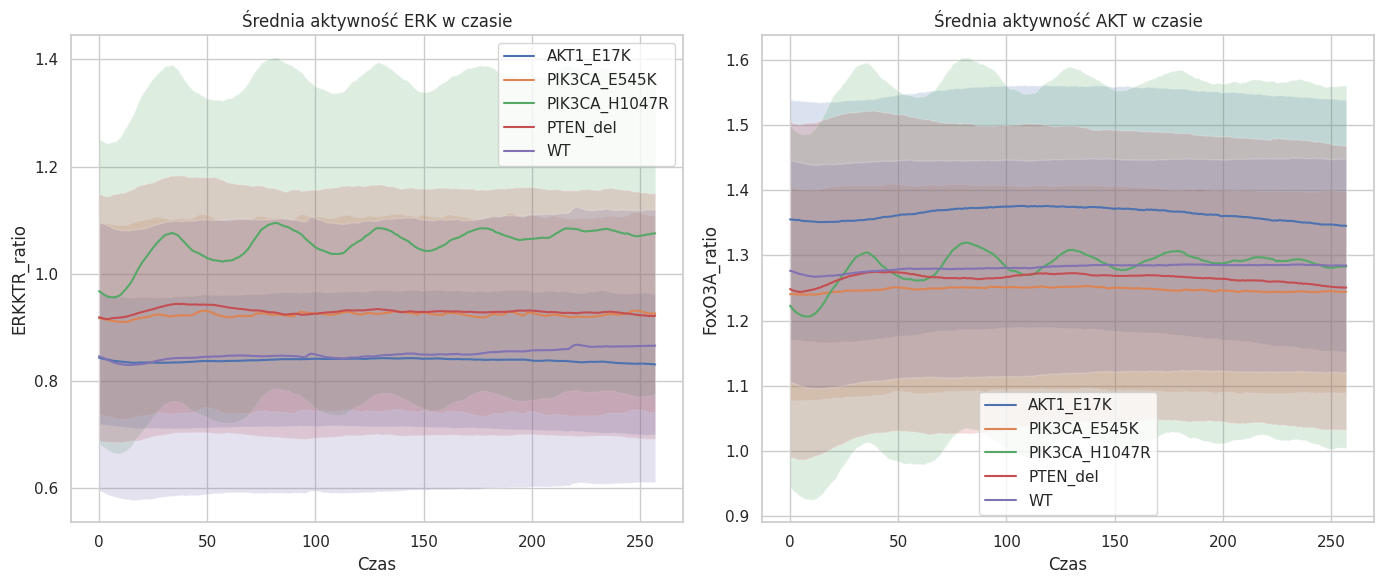

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stylizacja wykresów
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Wykres dla aktywności ERK
plt.subplot(1, 2, 1)
for mutation in summary['Mutation'].unique():
    subset = summary[summary['Mutation'] == mutation]
    plt.plot(subset['Time'], subset['ERK_mean'], label=mutation)
    plt.fill_between(subset['Time'], 
                    subset['ERK_mean'] - subset['ERK_std'], 
                    subset['ERK_mean'] + subset['ERK_std'], 
                    alpha=0.2)
plt.title('Średnia aktywność ERK w czasie')
plt.xlabel('Czas')
plt.ylabel('ERKKTR_ratio')
plt.legend()

# Wykres dla aktywności AKT
plt.subplot(1, 2, 2)
for mutation in summary['Mutation'].unique():
    subset = summary[summary['Mutation'] == mutation]
    plt.plot(subset['Time'], subset['AKT_mean'], label=mutation)
    plt.fill_between(subset['Time'], 
                    subset['AKT_mean'] - subset['AKT_std'], 
                    subset['AKT_mean'] + subset['AKT_std'], 
                    alpha=0.2)
plt.title('Średnia aktywność AKT w czasie')
plt.xlabel('Czas')
plt.ylabel('FoxO3A_ratio')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
#bierzemy czas od 60minuty do 180minuty, czyli 60/5=12 oraz 180/5=36  
summary_filtered = summary[(summary['Time'] >= 12) & (summary['Time'] <= 36)]

In [7]:
summary_filtered

,Mutation,Time,ERK_mean,ERK_std,AKT_mean,AKT_std
12,AKT1_E17K,12,0.835459,0.121117,1.351532,0.183850
13,AKT1_E17K,13,0.835176,0.120666,1.351192,0.183231
14,AKT1_E17K,14,0.834668,0.120718,1.351173,0.183472
15,AKT1_E17K,15,0.834381,0.121308,1.351108,0.184271
16,AKT1_E17K,16,0.834292,0.120911,1.351229,0.183733
...,...,...,...,...,...,...
1064,WT,32,0.841738,0.256202,1.274255,0.168353
1065,WT,33,0.841900,0.256268,1.274601,0.168384
1066,WT,34,0.842263,0.256431,1.274705,0.168397
1067,WT,35,0.842952,0.256792,1.275109,0.168502


In [8]:
mutation_WT = summary_filtered[summary_filtered['Mutation']=='WT']

In [9]:
mutation_WT

,Mutation,Time,ERK_mean,ERK_std,AKT_mean,AKT_std
1044,WT,12,0.830399,0.250705,1.267542,0.171325
1045,WT,13,0.830351,0.250981,1.267889,0.171273
1046,WT,14,0.830241,0.251100,1.267768,0.171712
1047,WT,15,0.830359,0.252058,1.268131,0.171710
1048,WT,16,0.830370,0.252310,1.268366,0.171583
1049,WT,17,0.831023,0.252504,1.268644,0.171487
1050,WT,18,0.831208,0.252565,1.269055,0.171311
1051,WT,19,0.831711,0.252441,1.268994,0.171057
1052,WT,20,0.832014,0.252436,1.268930,0.170959
1053,WT,21,0.832429,0.252620,1.269436,0.170946


In [10]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

mutation_tab = []
ERK_or_AKT_tab = []
test_tab = []
p_value_tab = []

# Pobierz unikalne mutacje, z wyłączeniem 'WT'
mutations_to_test = [m for m in summary_filtered['Mutation'].unique() if m != 'WT']

for mean_type in ['ERK_mean', 'AKT_mean']:
    for mutation in mutations_to_test:
        # Filtruj dane dla bieżącej mutacji
        mutation_pd = summary_filtered[summary_filtered['Mutation'] == mutation]

        # Sprawdź, czy dane dla obu grup (mutacja i WT) nie są puste przed testem
        if not mutation_pd.empty and not mutation_WT.empty:
            # Wykonaj test U Manna-Whitneya
            test, p_value = mannwhitneyu(mutation_pd[mean_type], mutation_WT[mean_type], alternative='two-sided')

            # Dodaj wyniki do list
            mutation_tab.append(mutation)
            # Usuń '_mean' z nazwy typu średniej (np. 'ERK_mean' -> 'ERK')
            ERK_or_AKT_tab.append(mean_type.replace('_mean', ''))
            test_tab.append(test)
            p_value_tab.append(p_value)
        else:
            print(f"Pomijam test dla mutacji '{mutation}' i typu średniej '{mean_type}' z powodu brakujących danych.")

# Stwórz słownik z wynikami
mutation_dict = {
    'mutation': mutation_tab,
    'track': ERK_or_AKT_tab,
    'test': test_tab,
    'p_values': p_value_tab
}

# Przekonwertuj słownik na DataFrame dla lepszej czytelności
results_df = pd.DataFrame(mutation_dict)

# Korekcja wielokrotnych porównań (Bonferroni)
dane = multipletests(results_df['p_values'], method='bonferroni')
results_df['p_values_bonferroni'] = dane[1]
results_df['significant'] = dane[0]

results_df

,mutation,track,test,p_values,p_values_bonferroni,significant
0,AKT1_E17K,ERK,306.0,9.073220e-01,1.000000e+00,False
1,PIK3CA_E545K,ERK,625.0,1.415656e-09,1.132525e-08,True
2,PIK3CA_H1047R,ERK,625.0,1.415656e-09,1.132525e-08,True
3,PTEN_del,ERK,625.0,1.415656e-09,1.132525e-08,True
4,AKT1_E17K,AKT,625.0,1.415656e-09,1.132525e-08,True
5,PIK3CA_E545K,AKT,0.0,1.415656e-09,1.132525e-08,True
6,PIK3CA_H1047R,AKT,298.0,7.858989e-01,1.000000e+00,False
7,PTEN_del,AKT,126.0,3.074624e-04,2.459699e-03,True


In [15]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

# Sortuj dane chronologicznie dla każdej komórki
merged_data = merged_data.sort_values(by=['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T'])

all_active_erk_data = [] # Lista do zbierania statusu aktywności ERK

# Iteruj przez każdą unikalną serię czasową komórki
for (exp_id, site, track_id), group_df in merged_data.groupby(['Exp_ID', 'Image_Metadata_Site', 'track_id']):

    temp_df = group_df.copy()
    temp_df['is_active_ERK'] = False # Domyślnie brak aktywacji

    signal_col = 'ERKKTR_ratio'
    active_col = 'is_active_ERK'
    time_series = temp_df[signal_col].values

    # Pomijaj zbyt krótkie lub puste serie danych
    if len(time_series) < 10 or pd.Series(time_series).isnull().all():
        all_active_erk_data.extend(temp_df[['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T', active_col]].to_dict(orient='records'))
        continue

    # Wypełnij NaN-y w danych dla find_peaks
    time_series_filled = pd.Series(time_series).interpolate(method='linear').values
    if pd.Series(time_series_filled).isnull().any():
        time_series_filled = pd.Series(time_series_filled).fillna(method='bfill').fillna(method='ffill').values

    # Oblicz 90. percentyl DLA TEJ KOMÓRKI
    percentile_90 = np.percentile(pd.Series(time_series).dropna(), 90)

    # Znajdź maksima powyżej 90. percentyla (distance = 3 punkty = 15 minut)
    peaks_indices, _ = find_peaks(time_series_filled, height=percentile_90, distance=3)

    # Oznacz punkty czasowe piku jako True
    if len(peaks_indices) > 0:
        temp_df.loc[temp_df.index[peaks_indices], active_col] = True

    # Zapisz wyniki dla tej komórki
    all_active_erk_data.extend(temp_df[['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T', active_col]].to_dict(orient='records'))

# Utwórz DataFrame z wynikami aktywacji
active_status_df = pd.DataFrame(all_active_erk_data)

# Połącz nową kolumnę 'is_active_ERK' z oryginalnym DataFrame
final_merged_data = pd.merge(
    merged_data,
    active_status_df,
    on=['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T'],
    how='left'
)

# Wypisz przykładowe wiersze i sumę punktów oznaczonych jako aktywne
print("\n--- Dane z 'is_active_ERK' (fragment) ---")
print(final_merged_data[['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T',
                         'ERKKTR_ratio', 'is_active_ERK']].head(50))
print(f"\nLiczba punktów 'is_active_ERK': {final_merged_data['is_active_ERK'].sum()}")


--- Dane z 'is_active_ERK' (fragment) ---
    Exp_ID  Image_Metadata_Site  track_id  Image_Metadata_T  ERKKTR_ratio  \
0        1                    1         1                 0      0.704407   
1        1                    1         1                 1      0.848242   
2        1                    1         1                 2      1.059170   
3        1                    1         1                 3      1.188000   
4        1                    1         1                 4      1.205540   
5        1                    1         1                 5      1.208040   
6        1                    1         1                 6      1.165190   
7        1                    1         1                 7      1.094710   
8        1                    1         1                 8      1.001350   
9        1                    1         1                 9      0.931540   
10       1                    1         1                10      0.890955   
11       1                    1  


Rozpoczynanie detekcji pików i aktywności dla 196909 komórek...
Przetworzono 10/196909 komórek.
Przetworzono 20/196909 komórek.
Przetworzono 30/196909 komórek.
Przetworzono 40/196909 komórek.
Przetworzono 50/196909 komórek.
Przetworzono 60/196909 komórek.
Przetworzono 70/196909 komórek.
Przetworzono 80/196909 komórek.
Przetworzono 90/196909 komórek.
Przetworzono 100/196909 komórek.
Przetworzono 110/196909 komórek.
Przetworzono 120/196909 komórek.
Przetworzono 130/196909 komórek.
Przetworzono 140/196909 komórek.
Przetworzono 150/196909 komórek.
Przetworzono 160/196909 komórek.
Przetworzono 170/196909 komórek.
Przetworzono 180/196909 komórek.
Przetworzono 190/196909 komórek.
Przetworzono 200/196909 komórek.
Przetworzono 210/196909 komórek.
Przetworzono 220/196909 komórek.
Przetworzono 230/196909 komórek.
Przetworzono 240/196909 komórek.
Przetworzono 250/196909 komórek.
Przetworzono 260/196909 komórek.
Przetworzono 270/196909 komórek.
Przetworzono 280/196909 komórek.
Przetworzono 290/196

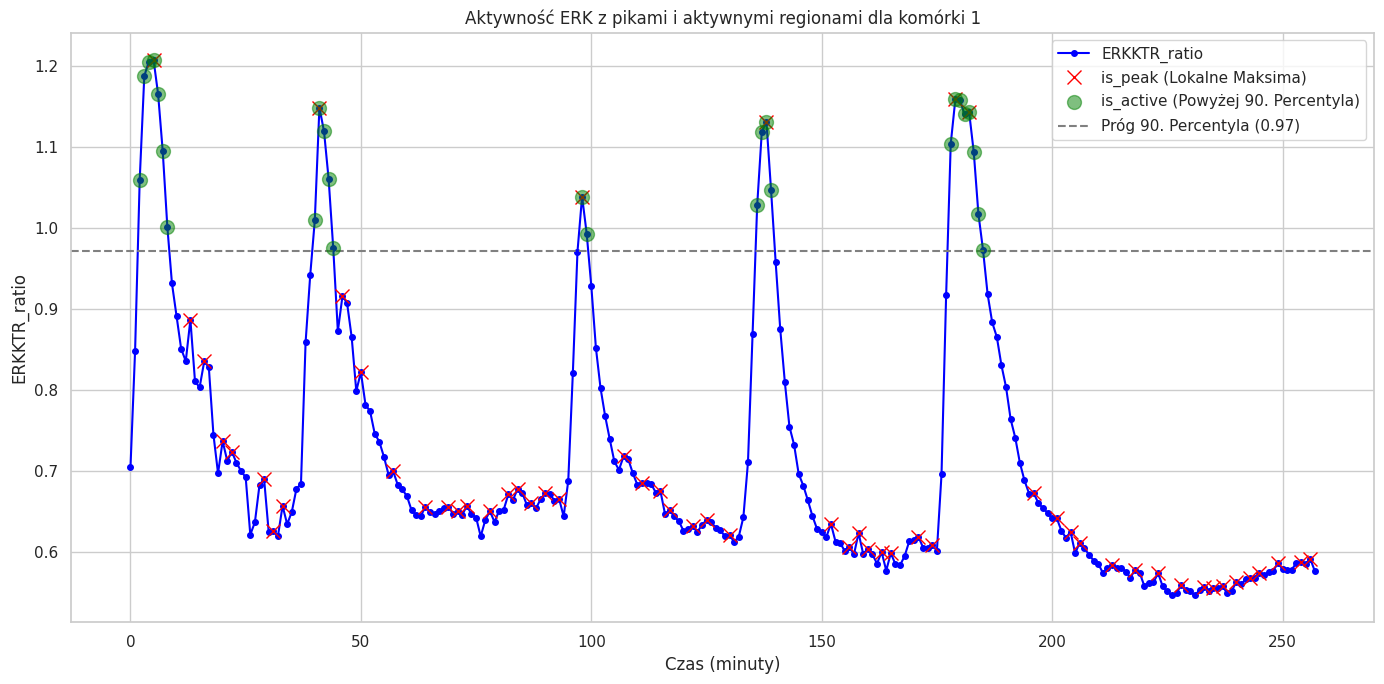

In [13]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt # Do wizualizacji, jeśli potrzebne

# Sortuj dane chronologicznie dla każdej komórki - kluczowe dla analizy szeregów czasowych
final_merged_data = final_merged_data.sort_values(by=['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T'])

# Lista do zbierania wyników dla nowo obliczonych kolumn
all_cell_activity_results = []

# Iteruj przez każdą unikalną serię czasową komórki
grouped_cells = final_merged_data.groupby(['Exp_ID', 'Image_Metadata_Site', 'track_id'])
total_cells = len(grouped_cells)
print(f"\nRozpoczynanie detekcji pików i aktywności dla {total_cells} komórek...")

for cell_idx, ((exp_id, site, track_id), group_df) in enumerate(grouped_cells):

    # Utwórz kopię, aby uniknąć SettingWithCopyWarning i pracować na niezależnym podzbiorze
    temp_df = group_df.copy()
    
    # Sortuj ponownie na wypadek, gdyby grupowanie zaburzyło kolejność
    temp_df = temp_df.sort_values(by='Image_Metadata_T')

    signal_col = 'ERKKTR_ratio'
    time_series = temp_df[signal_col].values

    # Inicjuj kolumny 'is_peak' i 'is_active' dla tej komórki na False
    temp_df['is_peak'] = False
    temp_df['is_active'] = False

    # Pomijaj zbyt krótkie lub puste serie danych, które nie nadają się do analizy
    if len(time_series) < 5 or pd.Series(time_series).isnull().all():
        # Zapisz domyślne (False) statusy i przejdź do następnej komórki
        all_cell_activity_results.extend(
            temp_df[['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T', 'is_peak', 'is_active']].to_dict(orient='records')
        )
        continue

    # Wypełnij NaN-y w danych dla find_peaks
    time_series_filled = pd.Series(time_series).interpolate(method='linear').values
    if pd.Series(time_series_filled).isnull().any(): # Obsługa NaNów na początku/końcu szeregu
        time_series_filled = pd.Series(time_series_filled).fillna(method='bfill').fillna(method='ffill').values
    
    # Dodatkowe sprawdzenie, czy po interpolacji i wypełnianiu NaNów nadal są tylko numeryczne wartości
    if pd.Series(time_series_filled).isnull().any():
        print(f"Ostrzeżenie: Po interpolacji i wypełnianiu NaNów, komórka {track_id} nadal ma NaN. Pomijam ją.")
        all_cell_activity_results.extend(
            temp_df[['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T', 'is_peak', 'is_active']].to_dict(orient='records')
        )
        continue

    # 2. Dla każdej komórki oblicz 90. percentyl
    # Używamy oryginalnych danych (nie wypełnionych NaNami) do obliczenia percentyla
    percentile_90 = np.percentile(pd.Series(time_series).dropna(), 90)

    # 3. W danych powyżej 90. percentyla znajdź maksima (i oznacz is_peak)
    # find_peaks znajduje LOKALNE maksima. Tutaj bez progu wysokości, aby złapać wszystkie.
    # Użycie distance=1 (domyślne) lub 0 nie jest konieczne, find_peaks już to obsługuje dla lokalnych maksimów
    peaks_indices, _ = find_peaks(time_series_filled)

    # 4. Przypisz 'is_peak' i 'is_active'
    
    # Oznacz punkty czasowe, które są lokalnymi maksimami (is_peak = True)
    if len(peaks_indices) > 0:
        temp_df.loc[temp_df.index[peaks_indices], 'is_peak'] = True

    # Oznacz punkty czasowe powyżej 90. percentyla jako aktywne (is_active = True)
    # To bezpośrednio realizuje "dla każdego punktu powyżej 90 percentyla, czy jest aktywny (active) = False lub True"
    active_points_above_threshold_indices = temp_df.index[time_series_filled >= percentile_90].tolist()
    if active_points_above_threshold_indices:
        temp_df.loc[active_points_above_threshold_indices, 'is_active'] = True

    # Zapisz tylko istotne kolumny dla tej komórki
    all_cell_activity_results.extend(
        temp_df[['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T', 'is_peak', 'is_active']].to_dict(orient='records')
    )

#    if (cell_idx + 1) % 10 == 0 or (cell_idx + 1) == total_cells:
#        print(f"Przetworzono {cell_idx + 1}/{total_cells} komórek.")

# Utwórz DataFrame z wynikami aktywacji
cell_activity_status_df = pd.DataFrame(all_cell_activity_results)

# Połącz nowo obliczone kolumny z oryginalnym DataFrame
# Użyj 'left' merge, aby zachować wszystkie oryginalne wiersze z final_merged_data
# i dodać do nich kolumny 'is_peak' i 'is_active'.
final_merged_data = pd.merge(
    final_merged_data,
    cell_activity_status_df,
    on=['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T'],
    how='left'
)

# Wypisz przykładowe wiersze i sumę punktów oznaczonych jako aktywne
print("\n--- Dane z nowymi kolumnami 'is_peak' i 'is_active' (fragment) ---")
print(final_merged_data[['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T',
                         'ERKKTR_ratio', 'is_peak', 'is_active']].head(50))
print(f"\nLiczba punktów 'is_peak': {final_merged_data['is_peak'].sum()}")
print(f"Liczba punktów 'is_active': {final_merged_data['is_active'].sum()}")


# --- Opcjonalna wizualizacja dla pojedynczej komórki, aby sprawdzić wyniki ---
# Wybierz pierwszą przetworzoną komórkę
first_cell_data = final_merged_data[
    (final_merged_data['Exp_ID'] == final_merged_data['Exp_ID'].iloc[0]) &
    (final_merged_data['Image_Metadata_Site'] == final_merged_data['Image_Metadata_Site'].iloc[0]) &
    (final_merged_data['track_id'] == final_merged_data['track_id'].iloc[0])
].sort_values(by='Image_Metadata_T')

if not first_cell_data.empty:
    plt.figure(figsize=(14, 7))
    plt.plot(first_cell_data['Image_Metadata_T'], first_cell_data['ERKKTR_ratio'], label='ERKKTR_ratio', color='blue', marker='o', markersize=4)

    # Nanieś miejsca pików
    peaks_df = first_cell_data[first_cell_data['is_peak']]
    plt.plot(peaks_df['Image_Metadata_T'], peaks_df['ERKKTR_ratio'], 'x', markersize=10, color='red', label='is_peak (Lokalne Maksima)')

    # Podświetl aktywne regiony
    active_df = first_cell_data[first_cell_data['is_active']]
    plt.scatter(active_df['Image_Metadata_T'], active_df['ERKKTR_ratio'], color='green', s=100, alpha=0.5, label='is_active (Powyżej 90. Percentyla)', zorder=5)

    # Oblicz 90. percentyl dla TEJ KONKRETNEJ komórki do wizualizacji
    percentile_90_for_plot = np.percentile(first_cell_data['ERKKTR_ratio'].dropna(), 90)
    plt.axhline(y=percentile_90_for_plot, color='gray', linestyle='--', label=f'Próg 90. Percentyla ({percentile_90_for_plot:.2f})')

    plt.title(f'Aktywność ERK z pikami i aktywnymi regionami dla komórki {first_cell_data["track_id"].iloc[0]}')
    plt.xlabel('Czas')
    plt.ylabel('ERKKTR_ratio')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [14]:
final_merged_data

,Exp_ID,Image_Metadata_Site,track_id,Image_Metadata_T,Nuclear_size,ERKKTR_ratio,FoxO3A_ratio,objNuclei_Location_Center_X,objNuclei_Location_Center_Y,Site,Cell_Line,Mutation,Biosensors,Conditions,Acquisition_frequency_min,Duration_h,is_peak,is_active
0,1,1,1,0,303.0000,0.704407,1.33383,932.211,875.248,1,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24,False,False
1,1,1,1,1,333.0000,0.848242,1.33791,932.150,874.174,1,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24,False,False
2,1,1,1,2,314.0000,1.059170,1.37627,932.376,873.787,1,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24,False,True
3,1,1,1,3,322.0000,1.188000,1.35754,932.168,873.453,1,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24,False,True
4,1,1,1,4,313.9990,1.205540,1.36695,931.146,872.885,1,MCF10A,WT,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35541643,6,24,1372,253,81.9999,1.287450,1.34448,698.317,223.537,24,MCF10A,PTEN_del,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24,False,False
35541644,6,24,1372,254,83.0000,1.265500,1.31116,697.506,224.217,24,MCF10A,PTEN_del,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24,False,False
35541645,6,24,1372,255,83.0000,1.263590,1.30931,697.410,223.988,24,MCF10A,PTEN_del,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24,False,False
35541646,6,24,1372,256,80.0002,1.249440,1.25123,696.400,224.488,24,MCF10A,PTEN_del,H2B-miRFP703_ErkKTR-mTurq.2_FoxO-mNeonGreen,GF_deprived_48h_before_aquisition_FN_(0.25ug/c...,5,24,False,False


In [16]:
final_merged_data.to_csv('output_final_data.csv', index=False)

print("DataFrame 'final_merged_data' został zapisany do pliku 'output_final_data.csv'")

DataFrame 'final_merged_data' został zapisany do pliku 'output_final_data.csv'


In [2]:
import pandas as pd
final_merged_data = pd.read_csv('output_final_data.csv')

In [3]:
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
from tqdm import tqdm

def calculate_spatial_active_neighbors_for_frame(frame_df, radius_override=None, max_radius_cap=20):

    results_for_frame = []
    
    # Kopiujemy dla bezpieczeństwa
    active_cells_in_frame = frame_df[frame_df['is_active'] == True].copy()

    # Zachowujemy tylko te, które mają poprawne współrzędne
    active_cells_in_frame.dropna(subset=['objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y'], inplace=True)
    
    # Jeśli brak aktywnych komórek lub za mało do KDTree
    if len(active_cells_in_frame) < 2:
        # Dla wszystkich komórek w oryginalnej klatce (nie tylko aktywnych),
        # ustawiamy Spatial_Active_Neighbours na 0 (jeśli aktywne) lub NaN (jeśli nieaktywne).
        for _, row in frame_df.iterrows():
            results_for_frame.append({
                'Exp_ID': row['Exp_ID'],
                'Image_Metadata_Site': row['Image_Metadata_Site'],
                'Image_Metadata_T': row['Image_Metadata_T'],
                'track_id': row['track_id'],
                'Spatial_Active_Neighbours': 0 if row['is_active'] else np.nan # 0 dla aktywnych bez sąsiadów, NaN dla nieaktywnych
            })
        return results_for_frame

    positions = active_cells_in_frame[['objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y']].values
    
    # Obliczanie promienia
    radius_to_use = radius_override
    if radius_to_use is None: # Użyj dynamicznego promienia, jeśli nie podano stałego
        tree_for_radius = KDTree(positions)
        distances, _ = tree_for_radius.query(positions, k=2) # Odległość do 2. najbliższego sąsiada
        nearest_distances = distances[:, 1]
        
        if len(nearest_distances) > 0:
            mean_distance = np.mean(nearest_distances)
            std_distance = np.std(nearest_distances)
            dynamic_radius = mean_distance + std_distance
            radius_to_use = min(dynamic_radius, max_radius_cap)
        else:
            # Jeśli nie można obliczyć dynamicznego (np. tylko 1 punkt), użyj rozsądnej wartości domyślnej
            radius_to_use = 50 # Przykładowa stała wartość, jeśli dynamiczny zawiedzie
    
    tree = KDTree(positions)

    # Przygotowanie słownika dla szybkiego mapowania track_id do licznika sąsiadów
    neighbor_counts_map = {}

    for i, (_, row_active) in enumerate(active_cells_in_frame.iterrows()):
        current_pos = positions[i]
        
        # Znajdź indeksy WSZYSTKICH sąsiadów w promieniu (w tym siebie)
        neighbors_indices_in_tree = tree.query_ball_point(current_pos, radius_to_use)
        
        # Liczba AKTYWNYCH sąsiadów (bez siebie)
        num_active_neighbors = len(neighbors_indices_in_tree) - 1 # Odejmujemy siebie
        
        neighbor_counts_map[row_active['track_id']] = num_active_neighbors
    
    # Teraz iterujemy po CAŁEJ oryginalnej klatce (frame_df), aby przypisać wyniki
    # W ten sposób zachowamy komórki nieaktywne lub te z NaN w pozycjach
    for _, row in frame_df.iterrows():
        count = neighbor_counts_map.get(row['track_id'], np.nan) # NaN dla komórek, których nie było w KDTree (np. nieaktywnych lub z NaN coords)
        
        # Jeśli komórka nie była aktywna, liczba aktywnych sąsiadów powinna być NaN
        if not row['is_active']:
            count = np.nan

        results_for_frame.append({
            'Exp_ID': row['Exp_ID'],
            'Image_Metadata_Site': row['Image_Metadata_Site'],
            'Image_Metadata_T': row['Image_Metadata_T'],
            'track_id': row['track_id'],
            'Spatial_Active_Neighbours': count
        })
    
    return results_for_frame

# --- Sekcja 3: Obliczanie i zapisywanie danych dla wszystkich klatek ---

all_spatial_neighbor_results = []

# Grupuj po każdej klatce czasowej (Exp_ID, Image_Metadata_Site, Image_Metadata_T)
grouped_frames = final_merged_data.groupby(['Exp_ID', 'Image_Metadata_Site', 'Image_Metadata_T'])
total_frames = len(grouped_frames)
#print(f"\nRozpoczynanie obliczania przestrzennych aktywnych sąsiadów dla {total_frames} klatek czasowych...")

for frame_idx, ((exp, site, timepoint), frame_df) in enumerate(grouped_frames):
    
    # Wywołaj funkcję dla bieżącej klatki
    frame_results = calculate_spatial_active_neighbors_for_frame(frame_df, radius_override=None, max_radius_cap=200) # Możesz ustawić radius_override na stałą np. 10
    all_spatial_neighbor_results.extend(frame_results)

    if (frame_idx + 1) % 500 == 0 or (frame_idx + 1) == total_frames:
        print(f"Przetworzono {frame_idx + 1}/{total_frames} klatek czasowych.")

# Utwórz DataFrame z wynikami przestrzennymi
spatial_neighbors_df = pd.DataFrame(all_spatial_neighbor_results)

# Połącz nową kolumnę z głównym DataFrame
# Użyj 'left' merge, aby upewnić się, że wszystkie oryginalne wiersze są zachowane.
final_merged_data = pd.merge(
    final_merged_data,
    spatial_neighbors_df,
    on=['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T'],
    how='left',
    suffixes=('', '_spatial') # Zapobieganie konfliktom nazw kolumn
)

print("\n--- Dane z nową kolumną 'Spatial_Active_Neighbours' (fragment) ---")
print(final_merged_data[['Exp_ID', 'Image_Metadata_T', 'track_id', 'is_active',
                         'Spatial_Active_Neighbours']].head(20))


# --- Sekcja 4: Obliczanie średniej dla każdej mutacji i rysowanie wykresu ---

# Agregacja: Średnia liczba aktywnych sąsiadów w czasie i według mutacji
# Filtrujemy tylko te komórki, które są aktywne i dla których obliczono sąsiadów
# (czyli Spatial_Active_Neighbours nie jest NaN)
active_cells_with_neighbors_df = final_merged_data[
    final_merged_data['is_active'] == True
].copy()

# Tutaj możesz dodatkowo usunąć NaN z Spatial_Active_Neighbours,
# jeśli jakaś komórka aktywna nie miała koordynatów do KDTree
active_cells_with_neighbors_df.dropna(subset=['Spatial_Active_Neighbours'], inplace=True)


if not active_cells_with_neighbors_df.empty:
    mean_active_neighbors_over_time_by_mutation = active_cells_with_neighbors_df.groupby(['Image_Metadata_T', 'Mutation'])['Spatial_Active_Neighbours'].mean().reset_index()

    print("\n--- Średnia liczba aktywnych sąsiadów w czasie dla AKTYWNYCH komórek (fragment) ---")
    print(mean_active_neighbors_over_time_by_mutation.head())

    # Wizualizacja: Jak średnia liczba aktywnych sąsiadów zmienia się w czasie dla każdej mutacji
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=mean_active_neighbors_over_time_by_mutation, x='Image_Metadata_T', y='Spatial_Active_Neighbours', hue='Mutation', marker='o')
    plt.title(f'Zmiany średniej liczby aktywnych sąsiadów w czasie dla AKTYWNYCH komórek')
    plt.xlabel('Czas')
    plt.ylabel('Średnia liczba aktywnych sąsiadów')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Mutacja')
    plt.tight_layout()
    plt.show()

else:
    print("\nBrak aktywnych komórek z obliczoną liczbą sąsiadów do analizy i wizualizacji.")



Przetworzono 500/30960 klatek czasowych.
Przetworzono 1000/30960 klatek czasowych.
Przetworzono 1500/30960 klatek czasowych.
Przetworzono 2000/30960 klatek czasowych.
Przetworzono 2500/30960 klatek czasowych.
Przetworzono 3000/30960 klatek czasowych.
Przetworzono 3500/30960 klatek czasowych.
Przetworzono 4000/30960 klatek czasowych.
Przetworzono 4500/30960 klatek czasowych.
Przetworzono 5000/30960 klatek czasowych.
Przetworzono 5500/30960 klatek czasowych.
Przetworzono 6000/30960 klatek czasowych.
Przetworzono 6500/30960 klatek czasowych.
Przetworzono 7000/30960 klatek czasowych.
Przetworzono 7500/30960 klatek czasowych.
Przetworzono 8000/30960 klatek czasowych.
Przetworzono 8500/30960 klatek czasowych.
Przetworzono 9000/30960 klatek czasowych.
Przetworzono 9500/30960 klatek czasowych.
Przetworzono 10000/30960 klatek czasowych.
Przetworzono 10500/30960 klatek czasowych.
Przetworzono 11000/30960 klatek czasowych.
Przetworzono 11500/30960 klatek czasowych.
Przetworzono 12000/30960 klatek

NameError: name 'plt' is not defined


--- Średnia liczba aktywnych sąsiadów w czasie
   Image_Metadata_T       Mutation  Spatial_Active_Neighbours
0                 0      AKT1_E17K                   2.048247
1                 0   PIK3CA_E545K                   2.603264
2                 0  PIK3CA_H1047R                   3.434882
3                 0       PTEN_del                   2.325209
4                 0             WT                   2.311457


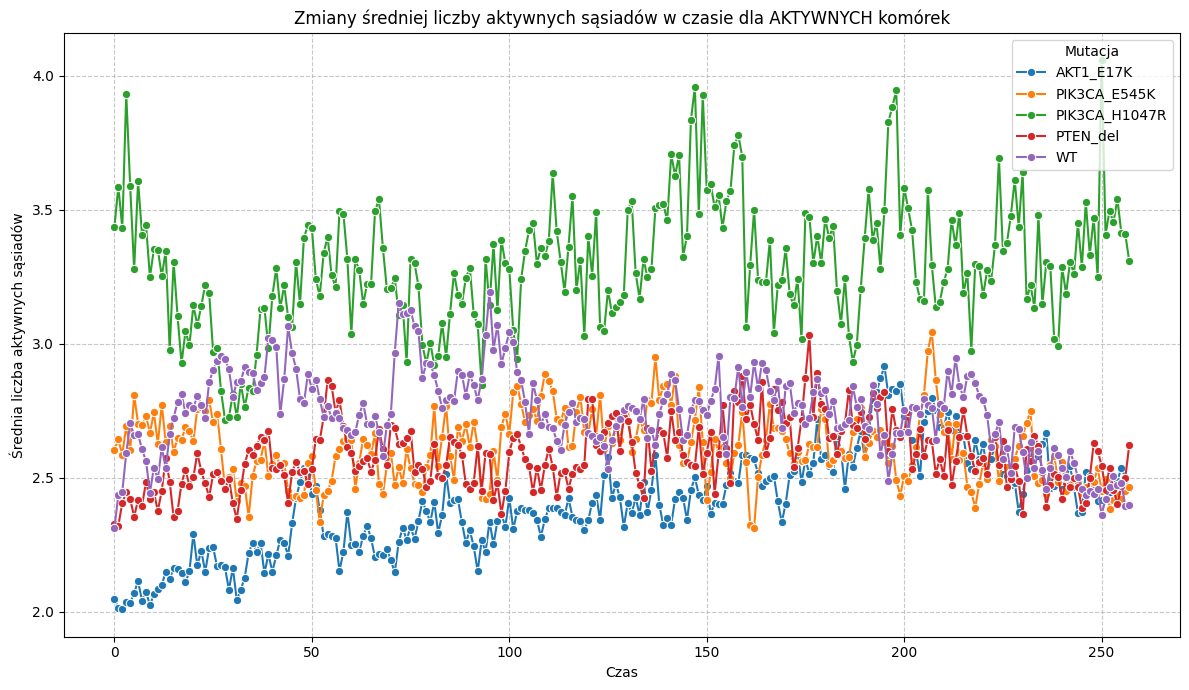

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

if not active_cells_with_neighbors_df.empty:
    mean_active_neighbors_over_time_by_mutation = active_cells_with_neighbors_df.groupby(['Image_Metadata_T', 'Mutation'])['Spatial_Active_Neighbours'].mean().reset_index()

    print("\n--- Średnia liczba aktywnych sąsiadów w czasie")
    print(mean_active_neighbors_over_time_by_mutation.head())

    # Wizualizacja: Jak średnia liczba aktywnych sąsiadów zmienia się w czasie dla każdej mutacji
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=mean_active_neighbors_over_time_by_mutation, x='Image_Metadata_T', y='Spatial_Active_Neighbours', hue='Mutation', marker='o')
    plt.title(f'Zmiany średniej liczby aktywnych sąsiadów w czasie dla AKTYWNYCH komórek')
    plt.xlabel('Czas')
    plt.ylabel('Średnia liczba aktywnych sąsiadów')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Mutacja')
    plt.tight_layout()
    plt.show()

else:
    print("\nBrak aktywnych komórek z obliczoną liczbą sąsiadów do analizy i wizualizacji.")


In [15]:
mean_active_neighbors_over_time_by_mutation

,Image_Metadata_T,Mutation,Spatial_Active_Neighbours
0,0,AKT1_E17K,2.048247
1,0,PIK3CA_E545K,2.603264
2,0,PIK3CA_H1047R,3.434882
3,0,PTEN_del,2.325209
4,0,WT,2.311457
...,...,...,...
1285,257,AKT1_E17K,2.460480
1286,257,PIK3CA_E545K,2.464878
1287,257,PIK3CA_H1047R,3.307500
1288,257,PTEN_del,2.621720


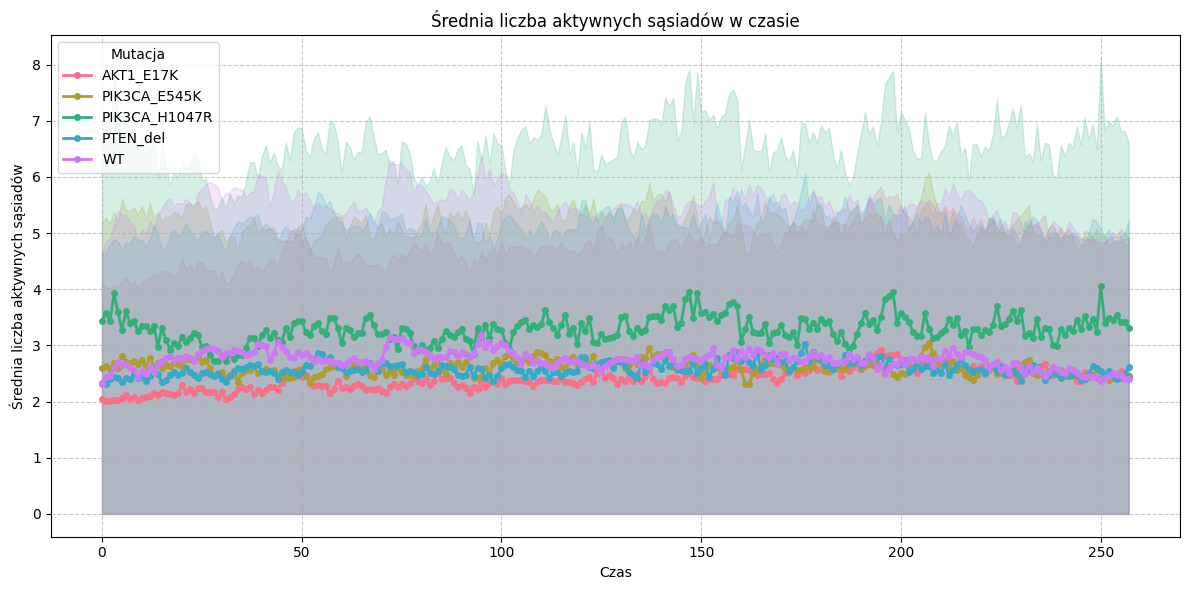

In [19]:
# if not df_avg.empty:
    # Pobranie listy unikalnych mutacji i generowanie kolorów
mutacje = mean_active_neighbors_over_time_by_mutation['Mutation'].unique()
colors = sns.color_palette("husl", len(mutacje)) # Generuj kolory automatycznie z palety seaborn

# Przygotowanie wykresu
plt.figure(figsize=(12, 6))

for i, mut in enumerate(mutacje):
    # Filtrowanie danych dla jednej mutacji
    mutation_data = mean_active_neighbors_over_time_by_mutation[mean_active_neighbors_over_time_by_mutation['Mutation'] == mut].sort_values(by='Image_Metadata_T')

    # Wykres średniej liczby aktywnych sąsiadów
    plt.plot(mutation_data['Image_Metadata_T'], mutation_data['Spatial_Active_Neighbours'], 
             label=mut, color=colors[i], marker='o', markersize=4, linewidth=2)

    # Wykres zakresu błędu (odchylenie standardowe ograniczone z dołu przez 0)
    # Upewnij się, że std_neighbors nie jest NaN (może być, jeśli tylko jeden aktywny punkt w grupie)
    # Interpolujemy NaNy dla std_neighbors, aby fill_between nie przerywał linii,
    # lub po prostu usuniemy wiersze z NaNami w std_neighbors, jeśli nie chcemy interpolacji.
    # Dla tego przypadku, bezpieczniej jest wypełnić, by wykres był ciągły.
    std_to_plot = mutation_data['Spatial_Active_Neighbours'].fillna(0) # Wypełnij NaN standard deviation zerem dla wykresu

    lower_bound = np.maximum(0, mutation_data['Spatial_Active_Neighbours'] - std_to_plot)
    upper_bound = mutation_data['Spatial_Active_Neighbours'] + std_to_plot

    plt.fill_between(mutation_data['Image_Metadata_T'],
                     lower_bound,  
                     upper_bound, 
                     color=colors[i], 
                     alpha=0.2) 
    
plt.title('Średnia liczba aktywnych sąsiadów w czasie')
plt.xlabel('Czas')
plt.ylabel('Średnia liczba aktywnych sąsiadów')
plt.legend(title='Mutacja')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#else:
#    print("\nBrak danych do wygenerowania wykresu średniej liczby aktywnych sąsiadów po agregacji.")


In [27]:
from scipy.stats import kruskal

# Grupujemy po mutacjach
mutations = [
    mutations['Spatial_Active_Neighbours'].values
    for _, mutations in mean_active_neighbors_over_time_by_mutation.groupby('Mutation')
]

# Test Kruskala–Wallisa
test, p_value = kruskal(*mutations)

print(f"P-wartość: {p_value}", p_value < 0.05)

P-wartość: 9.332071834381704e-184 True


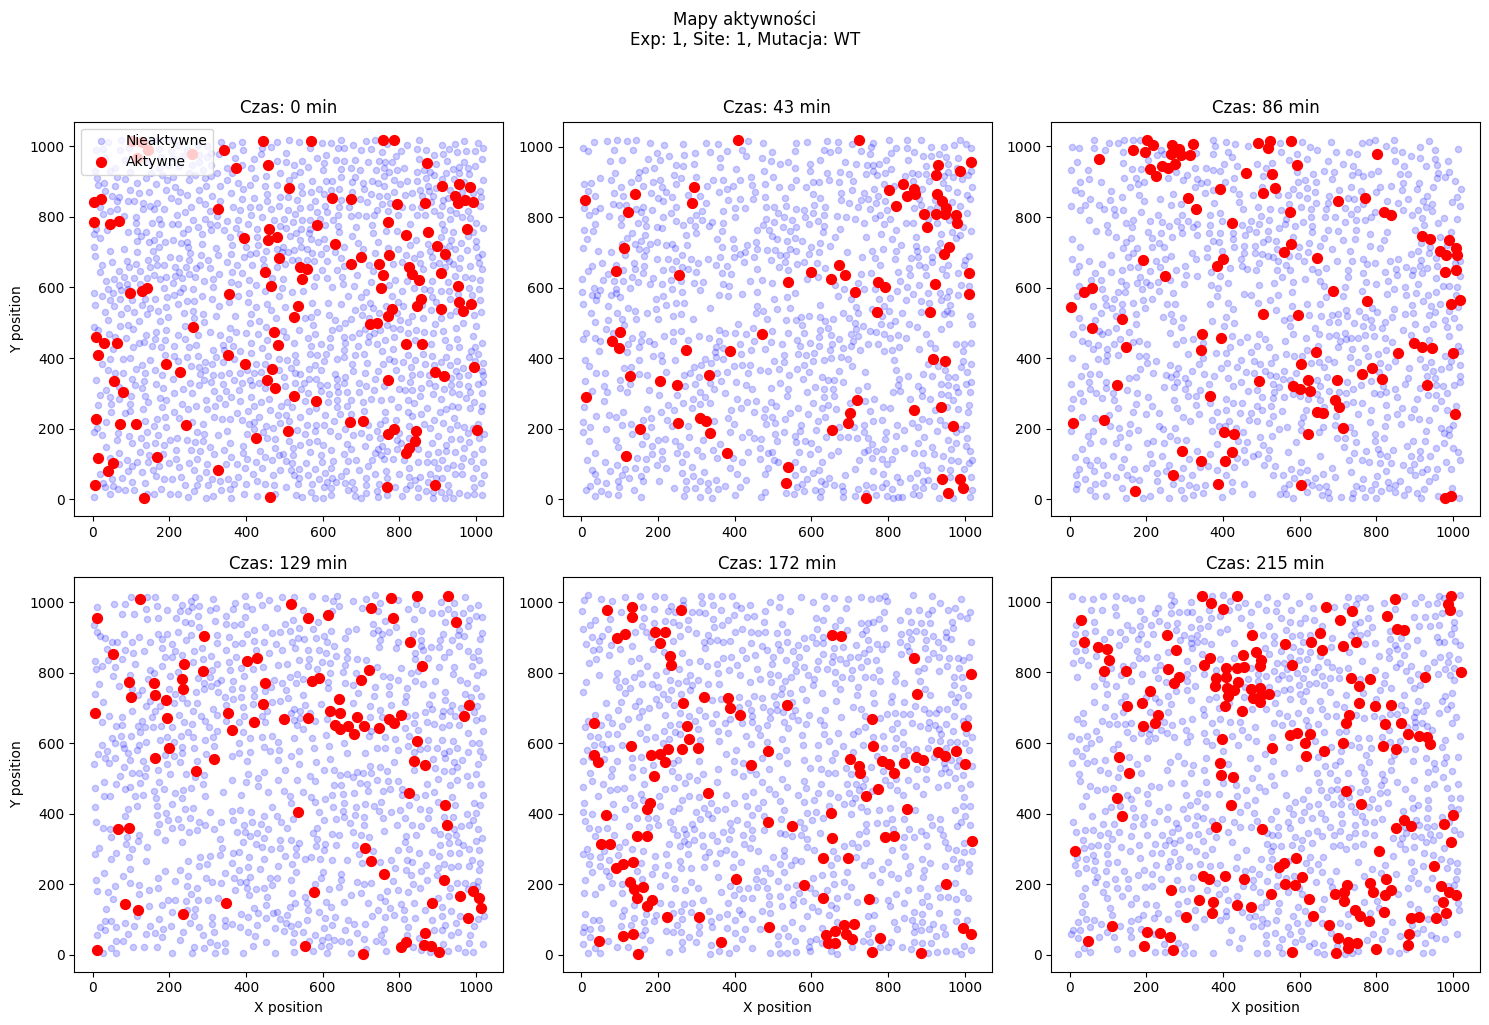

In [30]:
def plot_activity_grid(data, exp_id, site, time_points=None, mutation=None, n_cols=3):
    """
    Statyczna siatka map aktywności dla wybranych punktów czasowych
    
    Parametry:
    time_points - lista punktów czasowych (None = automatyczny wybór)
    n_cols - liczba kolumn w siatce
    """
    # Filtracja danych
    subset = data[(data['Exp_ID'] == exp_id) & 
                 (data['Image_Metadata_Site'] == site)]
    
    if mutation:
        subset = subset[subset['Mutation'] == mutation]
    
    if time_points is None:
        # Automatyczny wybór 6 klatek równomiernie rozłożonych
        unique_times = sorted(subset['Image_Metadata_T'].unique())
        time_points = unique_times[::max(1, len(unique_times)//6)][:6]
    
    # Przygotowanie siatki wykresów
    n_rows = int(np.ceil(len(time_points) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()
    
    for i, (time, ax) in enumerate(zip(time_points, axes)):
        frame_data = subset[subset['Image_Metadata_T'] == time]
        
        # Podział na kategorie
        active = frame_data[frame_data['is_active']]
        inactive = frame_data[~(frame_data['is_active'] | frame_data['is_peak'])]
        
        # Wizualizacja
        ax.scatter(inactive['objNuclei_Location_Center_X'], 
                  inactive['objNuclei_Location_Center_Y'], 
                  c='blue', label='Nieaktywne', s=20, alpha=0.2)
        ax.scatter(active['objNuclei_Location_Center_X'], 
                  active['objNuclei_Location_Center_Y'], 
                  c='red', label='Aktywne', s=50)
        
        ax.set_title(f'Czas: {time}')
        ax.set_xlabel('X position' if i >= (n_rows-1)*n_cols else '')
        ax.set_ylabel('Y position' if i % n_cols == 0 else '')
        
        if i == 0:
            ax.legend()
    
    plt.suptitle(f'Mapy aktywności\nExp: {exp_id}, Site: {site}, Mutacja: {mutation or "all"}', y=1.02)
    plt.tight_layout()
    plt.show()

# Przykład użycia:
plot_activity_grid(final_merged_data, sample_exp, sample_site, mutation=sample_mutation)

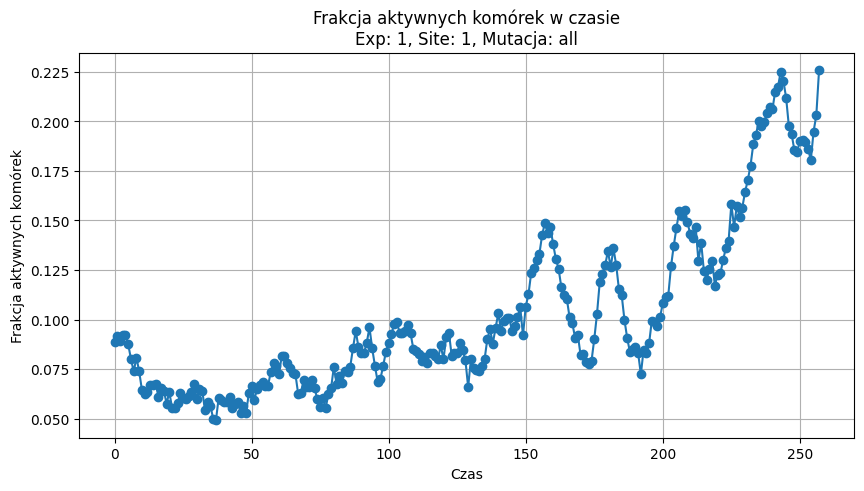

In [32]:
def analyze_activation_propagation(data, exp_id, site, mutation=None):
    """Analiza propagacji aktywności w czasie"""
    # Filtracja danych
    subset = data[(data['Exp_ID'] == exp_id) & 
              (data['Image_Metadata_Site'] == site)]
    
    if mutation:
        subset = subset[subset['Mutation'] == mutation]
    
    # Obliczenie frakcji aktywnych komórek w czasie
    activation_frac = subset.groupby('Image_Metadata_T')['is_active'].mean()
    
    # Wizualizacja
    plt.figure(figsize=(10, 5))
    activation_frac.plot(marker='o')
    plt.title(f'Frakcja aktywnych komórek w czasie\nExp: {exp_id}, Site: {site}, Mutacja: {mutation or "all"}')
    plt.xlabel('Czas')
    plt.ylabel('Frakcja aktywnych komórek')
    plt.grid(True)
    plt.show()

analyze_activation_propagation(final_merged_data, sample_exp, sample_site)

In [41]:
def create_activity_gif(data, exp_id, site, mutation=None, output_path='activity_animation.gif', 
                       frame_duration=0.5, dpi=100):
    """
    Tworzy animowany GIF z mapami aktywności komórek w czasie
    
    Parametry:
    data - DataFrame z danymi
    exp_id - ID eksperymentu
    site - numer miejsca
    mutation - filtr dla konkretnej mutacji (None = wszystkie)
    output_path - ścieżka do zapisu GIF
    frame_duration - czas trwania klatki w sekundach
    dpi - rozdzielczość obrazów
    """
    # Filtracja danych
    subset = data[(data['Exp_ID'] == exp_id) & 
                 (data['Image_Metadata_Site'] == site)]
    
    if mutation:
        subset = subset[subset['Mutation'] == mutation]
    
    time_points = sorted(subset['Image_Metadata_T'].unique())
    
    # Wyznaczenie stałych zakresów osi X i Y
    x_min, x_max = subset['objNuclei_Location_Center_X'].min(), subset['objNuclei_Location_Center_X'].max()
    y_min, y_max = subset['objNuclei_Location_Center_Y'].min(), subset['objNuclei_Location_Center_Y'].max()
    
    # Dodaj margines dla lepszej widoczności
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.05
    
    # Przygotowanie tymczasowego folderu
    temp_dir = "temp_frames"
    os.makedirs(temp_dir, exist_ok=True)
    frame_paths = []
    
    # Generowanie poszczególnych klatek
    for i, time in enumerate(tqdm(time_points, desc="Generowanie klatek")):
        frame_data = subset[subset['Image_Metadata_T'] == time]
        
        plt.figure(figsize=(10, 8))
        
        active = frame_data[frame_data['is_active']]
        inactive = frame_data[~(frame_data['is_active'] | frame_data['is_peak'])]
        
        plt.scatter(inactive['objNuclei_Location_Center_X'], 
                   inactive['objNuclei_Location_Center_Y'], 
                   c='blue', label='Nieaktywne', s=20, alpha=0.2)
        plt.scatter(active['objNuclei_Location_Center_X'], 
                   active['objNuclei_Location_Center_Y'], 
                    c='red', label='Aktywne', s=50)
        
        plt.title(f'Mapa aktywności\nExp: {exp_id}, Site: {site}, Mutacja: {mutation or "all"}\nCzas: {time}')
        plt.xlabel('X position')
        plt.ylabel('Y position')
        plt.legend(loc='upper right')  
        plt.grid(True)
        
        # Ustalony zakres osi
        plt.xlim(x_min - x_margin, x_max + x_margin)
        plt.ylim(y_min - y_margin, y_max + y_margin)
        
        frame_path = f"{temp_dir}/frame_{i:03d}.png"
        plt.savefig(frame_path, dpi=dpi, bbox_inches='tight')
        frame_paths.append(frame_path)
        plt.close()
    
    # Tworzenie GIF-a z klatek
    with imageio.get_writer(output_path, mode='I', duration=frame_duration) as writer:
        for frame_path in tqdm(frame_paths, desc="Tworzenie GIF"):
            image = imageio.imread(frame_path)
            writer.append_data(image)
    
    # Usunięcie tymczasowych plików
    for frame_path in frame_paths:
        os.remove(frame_path)
    os.rmdir(temp_dir)
    
    print(f"GIF został zapisany jako: {output_path}")




In [42]:
sample_exp = final_merged_data['Exp_ID'].iloc[0]
sample_site = final_merged_data['Image_Metadata_Site'].iloc[0]
sample_mutation = 'WT' 

create_activity_gif(
    final_merged_data, 
    exp_id=sample_exp, 
    site=sample_site, 
    mutation=sample_mutation,
    output_path='cell_activity_animation.gif',
    frame_duration=0.3  # krótszy czas = szybsza animacja
)

Tworzenie GIF:   0%|                                    | 0/258 [00:00<?, ?it/s]/tmp/ipykernel_14302/537002500.py:71: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame_path)
Tworzenie GIF: 100%|█████████████████████████| 258/258 [00:02<00:00, 112.67it/s]


GIF został zapisany jako: cell_activity_animation.gif
